# **Fully Connected Neural Network on Fashion Mnist Dataset**

## *Author: Rizwan Rizwan*
Date of Submission: 19/08/2023

## **1. Load the FashionMnist Dataset**
fashion_mnist dataset is available in tensflow library, so we don't need to download dataset seperately.

In [1]:
# Import the libraries and load the fashion_mnist dataset
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

## **2. Split the data into x_train, y_train, x_test and y_test.**

In [2]:
# Splitting the data into training and testing sets
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


### *2a. Display the sample images from x_train*

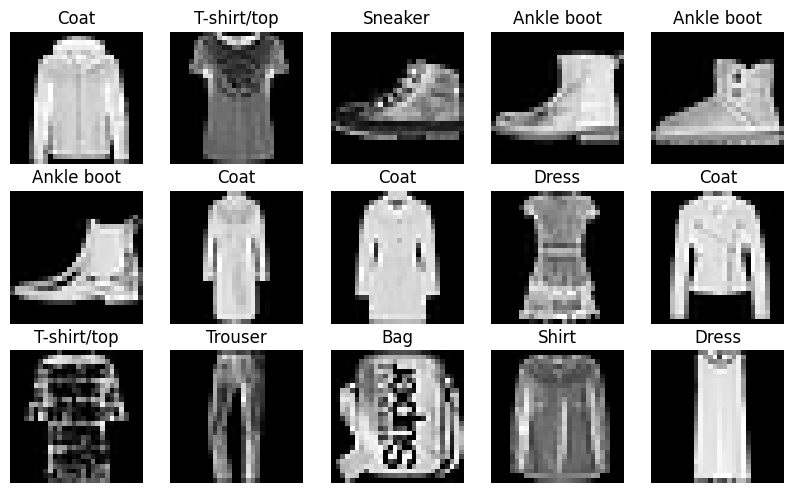

In [30]:
# Define the class labels
import matplotlib.pyplot as plt

class_labels = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress',
    'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# Display sample images
plt.figure(figsize=(10, 10))
for i in range(15):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_labels[y_train[i]])
    plt.axis('off')
plt.show()

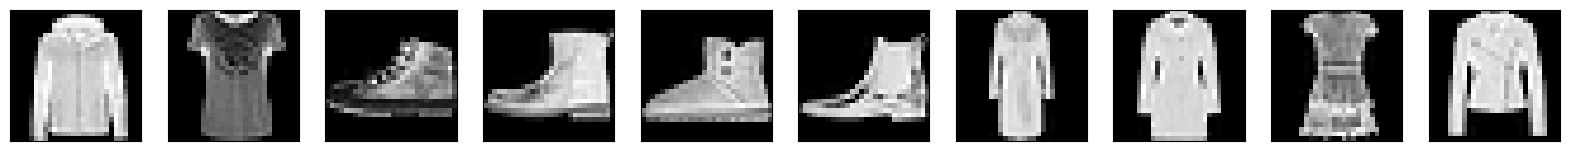

In [31]:
import matplotlib.pyplot as plt

# Number of digits to display
n = 10

# Create a figure to display the images
plt.figure(figsize=(20, 4))

# Loop through the first 'n' images
for i in range(n):
    # Create a subplot within the figure
    ax = plt.subplot(2, n, i + 1)

    # Display the original image
    plt.imshow(X_train[i].reshape(28, 28))

    # Set colormap to grayscale
    plt.gray()

    # Hide x-axis and y-axis labels and ticks
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Show the figure with the images
plt.show()

# Close the figure
plt.close()

**Labels**\
Each training and test example is assigned to one of the following labels:

| Label | Description   |
|-------|---------------|
| 0     | T-shirt/top   |
| 1     | Trouser       |
| 2     | Pullover      |
| 3     | Dress         |
| 4     | Coat          |
| 5     | Sandal        |
| 6     | Shirt         |
| 7     | Sneaker       |
| 8     | Bag           |
| 9     | Ankle boot    |

### *2b. Display the shape of X_train and y_train & X_test and y_test*

In [6]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
assert X_train.shape==(60000, 28, 28)
assert X_test.shape==(10000, 28, 28)
assert y_train.shape==(60000,)
assert y_test.shape==(10000,)

# Summarize loaded dataset
print('Train:X=%s, y=%s'%(X_train.shape, y_train.shape))
print('Test:X=%s, y=%s'%(X_test.shape, y_test.shape))

Train:X=(60000, 28, 28), y=(60000,)
Test:X=(10000, 28, 28), y=(10000,)


## **3. Flatten the images**
### *a. Reshape the images from 28x28 to 784-dimension vector.*

In [7]:
# Print the shapes of the original training data and labels
print("Previous X_train shape: {} \nPrevious y_train shape:{}".format(X_train.shape, y_train.shape))

# Reshape training and testing data to a flat format (flattening the images)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

Previous X_train shape: (60000, 28, 28) 
Previous y_train shape:(60000,)


In [8]:
X_train.dtype

dtype('uint8')

X_train and X_test data type is 'unit8'. Converting uint8 (unsigned 8-bit integers) images to float32 allows you to scale the pixel values to this range more easily

## **4. Scale the data**
### *4a. Convert the data into float 32 type*

In [9]:
# Convert the data type of the images to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [12]:
# lets check the data type again
print(X_train.dtype)
print(X_test.dtype)

float32
float32


### *4b. Scale the data by dividing X_train and y_train by 255*

In [13]:
# Normalize the pixel values to a range between 0 and 1  # Zero is for Black  #1 for White
X_train /= 255
X_test /= 255

### *4c. Display the shape of x_train and y_train after scaling.*

In [14]:
# Display the shape of x_train and y_train after scaling
print(X_train.shape)
print(y_train.shape)

(60000, 784)
(60000,)


In [15]:
# Number of classes in the dataset
classes = 10
# Convert the labels to one-hot encoded format
y_train = to_categorical(y_train, classes)
y_test = to_categorical(y_test, classes)

# Print the shapes of the preprocessed training data and labels
print("New X_train shape: {} \nNew Y_train shape:{}".format(X_train.shape, y_train.shape))

New X_train shape: (60000, 784) 
New Y_train shape:(60000, 10)


## **5. Define the hyper parameters for the neural networks**
### *5a. Learning rate*
In deep learning, the learning rate is a key parameter determining how much model weights are adjusted during training to minimize the loss function.\
It affects convergence speed: high rates might cause instability, while low rates slow convergence.

### *5b. No. of Epochs*
In deep learning, the term "epochs" refers to the number of times a machine learning model iterates through the entire training dataset during training.\
Each epoch consists of one forward and backward pass of all training examples, contributing to the gradual improvement of the model's performance.

### *5c. Batch size*
Batch size in deep learning refers to the number of training examples utilized in a single iteration of gradient descent during training.\
It impacts both computational efficiency and model performance. Larger batch sizes can lead to faster training but may require more memory,\
while smaller batch sizes can provide more accurate updates but may converge slower.

### *5d. Input_size*
Input size in a deep learning neural network refers to the dimensionality or number of features in the input data that is fed into the network for processing.

### *5e. Hidden layer*
Hidden layer is an intermediate computational layer in a deep neural network, processing inputs through neurons and activation functions to learn intricate patterns and representation

### *5f. Output layer*
The output layer in a deep learning neural network produces the final predictions or classifications based on the computations performed in the preceding hidden layers.\
It typically uses an activation function appropriate for the task, such as softmax for classification or linear activation for regression.

## **Setting up Hyper-parameters**

In [16]:
# Define the input size for each data sample (e.g., image pixels)
input_size = 784

# Specify the number of data samples to process in each batch
batch_size = 32

# Define the number of neurons in the first hidden layer
hidden1 = 128

# Define the number of neurons in the second hidden layer
hidden2 = 64

# Define the total number of classes/categories in the dataset
classes = 10

# Set the number of complete passes through the dataset during training
epochs = 10

## **6. Define the Structure of your neural network**
### *6a. No. of Hidden layers*
There are two hidden layers
### *6b. Activation function for each layer of neurons*
Relu (Rectified Linear Unit) activation function for both hidden layers
### *6c. No. of output layer neurons and activation function*
10 neurons in output layer and 'softmax' as activation function as it is a case of multiclass classification.
### *6d. Compile the model and provide following arguments*
- loss = 'categorical_crossentropy'
- optimizer = 'sgd'
- metrics= 'accuracy'

### *6e. Model Summary*
added in code

## **7. Train the Neural Network**
### *a. Fit the model*

## **Building the FCN Model**

In [17]:
import tensorflow as tf

# Define and compile the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 32  # Adjust the batch size as needed
model.fit(X_train, y_train, epochs=10, batch_size=batch_size)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=batch_size)

# Print test accuracy and test loss
print('Training Accuracy:', test_acc)
print('Training Loss:', test_loss)

# Display a summary of the model architecture, showing the layers and parameter counts
model.summary()

Epoch 1/10
1875/1875 [==============================] - 15s 6ms/step - loss: 0.4925 - accuracy: 0.8262
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3671 - accuracy: 0.8643
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3293 - accuracy: 0.8781
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3088 - accuracy: 0.8854
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2912 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2759 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2636 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2532 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2436 - accuracy: 0.9082
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3758

## **8. Test the Model**
### *8a. Find the testing accuracy of the model*

In [18]:
# Import the necessary libraries
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities for the test set using the trained model
y_pred_probs = model.predict(X_test, verbose=1)
y_pred = np.where(y_pred_probs > 0.5, 1, 0)

# Calculate and print the test accuracy using predicted and true labels
test_accuracy = accuracy_score(y_pred, y_test)
print("\nTest accuracy: {}".format(test_accuracy))

313/313 [==============================] - 1s 2ms/step

Test accuracy: 0.857


### *8b. Compare the training and testing accuracy and write observation*
Training accuracy achived around 88% and testing accuracy of 86% which is pretty good. if training accuracy is significantly higher than the testing accuracy, this phenomenon is called overfitting. It means model is not performing well on unseen data. However in our case training and testing accuracy are closer, that is good.

In [19]:
# Define a mask for selecting a range of indices (20 to 49)
mask = range(20, 50)

# Select the first 20 samples from the test set for visualization
X_valid = X_test[0:20]
actual_labels = y_test[0:20]

# Predict probabilities for the selected validation samples
y_pred_probs_valid = model.predict(X_valid)
y_pred_valid = np.where(y_pred_probs_valid > 0.5, 1, 0)

1/1 [==============================] - 0s 21ms/step


### *8c. Display the images with the predicted labels*

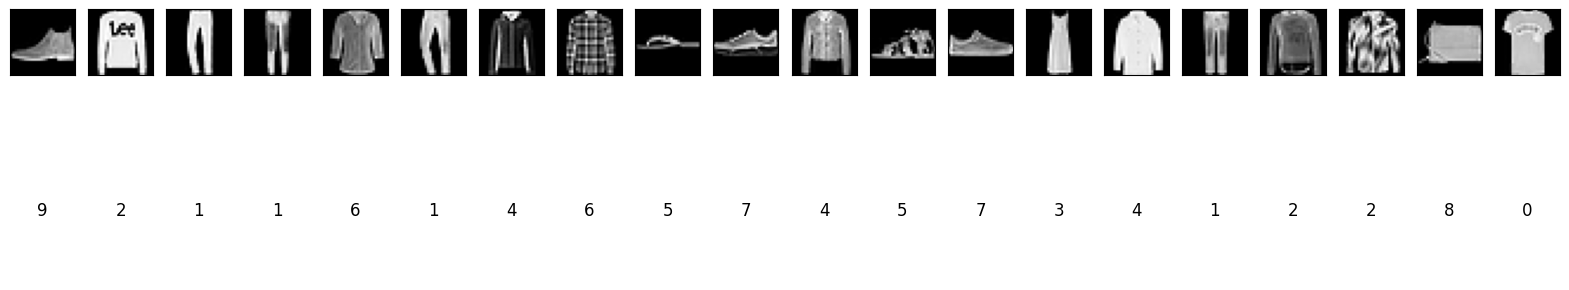

In [20]:
 #Set up a figure to display images
n = len(X_valid)
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display the original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_valid[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display the predicted digit
    predicted_digit = np.argmax(y_pred_probs_valid[i])
    ax = plt.subplot(2, n, i + 1 + n)
    plt.text(0.5, 0.5, str(predicted_digit), fontsize=12, ha='center', va='center')
    plt.axis('off')

# Show the plotted images
plt.show()

# Close the plot
plt.close()

| Label | Description   |
|-------|---------------|
| 0     | T-shirt/top   |
| 1     | Trouser       |
| 2     | Pullover      |
| 3     | Dress         |
| 4     | Coat          |
| 5     | Sandal        |
| 6     | Shirt         |
| 7     | Sneaker       |
| 8     | Bag           |
| 9     | Ankle boot    |

In [21]:
# Make predictions with the model
predictions=model.predict(X_test)

# Print the shape of the predictions array
print(predictions.shape)

# Print the first 10 predictions
print(predictions[:10])

# Print the predictions to class labels
import numpy as np
print(np.argmax(predictions, axis=1))

# Print the first 10 class labels
print(y_test[:10])

313/313 [==============================] - 2s 5ms/step
(10000, 10)
[[2.58192699e-06 2.27924772e-07 1.50810445e-06 1.23156940e-06
  5.01815078e-09 1.12603232e-03 1.59598073e-06 6.59928750e-03
  1.58260278e-07 9.92267430e-01]
 [7.70820989e-05 3.82310720e-18 9.98026609e-01 5.71652656e-11
  1.40664924e-03 6.25129106e-21 4.89535625e-04 1.64171799e-23
  3.03643959e-12 1.79640071e-16]
 [9.36634624e-12 9.99999940e-01 2.74403872e-13 1.47875734e-09
  2.20839894e-13 9.60247930e-20 4.17870643e-12 1.71189794e-20
  4.14524795e-15 5.40637307e-18]
 [5.97427177e-11 9.99999940e-01 3.26625879e-11 5.13446663e-09
  4.43039442e-12 2.08871443e-16 1.42547918e-10 5.61426209e-17
  5.07791780e-14 6.18960983e-15]
 [1.14406630e-01 1.13441381e-08 1.80762317e-02 3.13712313e-04
  1.45831553e-03 1.90009004e-08 8.65740299e-01 2.27969268e-10
  4.50484276e-06 2.20639222e-07]
 [1.28576438e-09 9.99999940e-01 5.38513290e-10 1.47503405e-08
  7.85426099e-11 2.96474311e-18 1.34635969e-09 9.61791746e-19
  2.77499757e-13 1.72939

## **Plot the training and validation loss**

Epoch 1/5
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5051 - accuracy: 0.8232 - val_loss: 0.3905 - val_accuracy: 0.8648
Epoch 2/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3845 - accuracy: 0.8634 - val_loss: 0.3503 - val_accuracy: 0.8754
Epoch 3/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3416 - accuracy: 0.8759 - val_loss: 0.3314 - val_accuracy: 0.8824
Epoch 4/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3172 - accuracy: 0.8838 - val_loss: 0.3094 - val_accuracy: 0.8856
Epoch 5/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2956 - accuracy: 0.8906 - val_loss: 0.3022 - val_accuracy: 0.8854


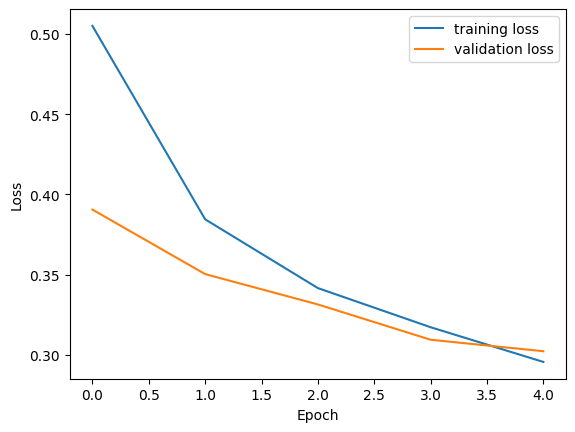

In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt
(X_train, y_train), (X_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

# Preprocess the data
X_train=X_train/255
X_test=X_test/255

# Split the data into training and validation sets
X_valid, X_train=X_train[:5000], X_train[5000:]
y_valid, y_train=y_train[:5000], y_train[5000:]

# Build the model
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history= model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

# Plot the training and validation loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

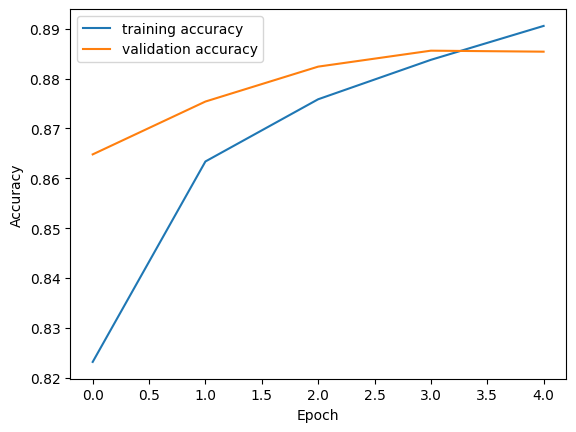

In [23]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()